## computer vision



In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import scripts form git

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-10-16 05:27:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-16 05:27:49 (125 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data, walk_through_dir

#data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-10-16 05:27:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 172.253.119.207, 108.177.111.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   261MB/s    in 0.4s    

2023-10-16 05:27:51 (261 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("pizza_steak.zip")

In [ ]:
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
dir="pizza_steak"
file=os.listdir(dir)

In [ ]:
for dirpath,dirnames,filenames in os.walk(dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


visualize


In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image Shape:{img.shape}")
  return img

Image Shape:(512, 512, 3)


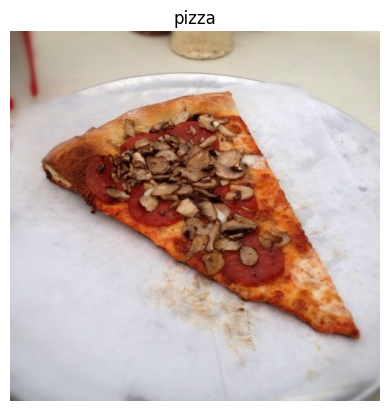

In [ ]:
img=view_random_image("pizza_steak/train/","pizza")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255)
vailid_datagren=ImageDataGenerator(rescale=1./255)
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"


#Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
valid_data=vailid_datagren.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model=tf.keras.Sequential()

In [ ]:

model.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # This line was missing in your code

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history1=model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 27s 246ms/step - loss: 0.5885 - accuracy: 0.6687 - val_loss: 0.4230 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4304 - accuracy: 0.8027 - val_loss: 0.3446 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.4320 - accuracy: 0.8080 - val_loss: 0.4352 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4048 - accuracy: 0.8207 - val_loss: 0.3380 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3478 - accuracy: 0.8553 - val_loss: 0.3079 - val_accuracy: 0.8660


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])


In [ ]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=Adam(),metrics=["accuracy"])

In [ ]:
history_4=model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 144ms/step - loss: 2.8087 - accuracy: 0.6473 - val_loss: 0.4542 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4803 - accuracy: 0.7840 - val_loss: 0.4268 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3453 - accuracy: 0.8687 - val_loss: 0.3973 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.1830 - accuracy: 0.9367 - val_loss: 0.4405 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.0712 - accuracy: 0.9873 - val_loss: 0.5526 - val_accuracy: 0.8060


In [ ]:
model5=Sequential([
    Conv2D(filters=10,
           kernel_size=5,
           strides=1,
           padding="same",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=Adam(),metrics=["accuracy"])

In [ ]:
history_5=model5.fit(train_data,epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=valid_data,
                   validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 152ms/step - loss: 1.0297 - accuracy: 0.4847 - val_loss: 0.6826 - val_accuracy: 0.6060
Epoch 2/5
47/47 [==============================] - 7s 143ms/step - loss: 0.5643 - accuracy: 0.7333 - val_loss: 0.6197 - val_accuracy: 0.6000
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3920 - accuracy: 0.8607 - val_loss: 0.6452 - val_accuracy: 0.6760
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.2402 - accuracy: 0.9180 - val_loss: 0.6270 - val_accuracy: 0.7100
Epoch 5/5
47/47 [==============================] - 8s 163ms/step - loss: 0.1238 - accuracy: 0.9647 - val_loss: 0.6793 - val_accuracy: 0.7020


<Axes: >

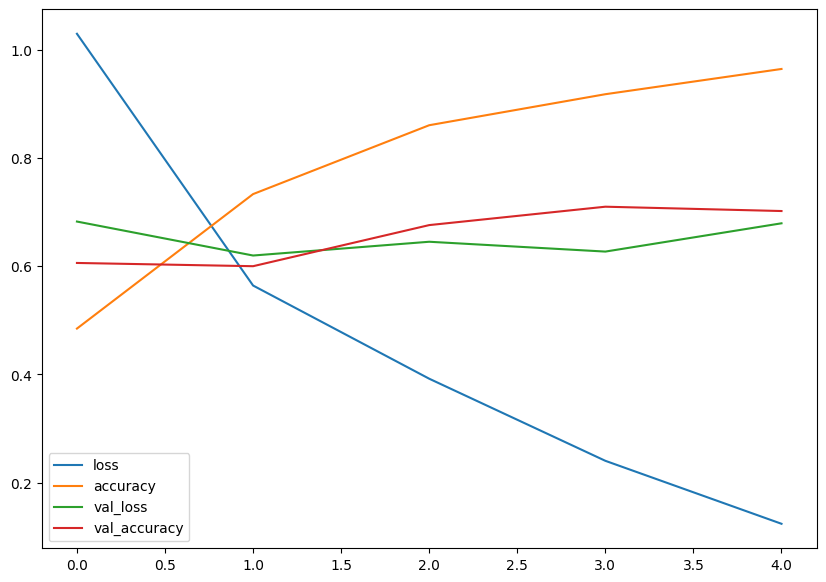

In [ ]:
import pandas as pd
pd.DataFrame(history_5.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  plt.plot(epochs,loss,label="train_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.legend()
  plt.figure()
  plt.plot(epochs,accuracy,label="accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.legend()

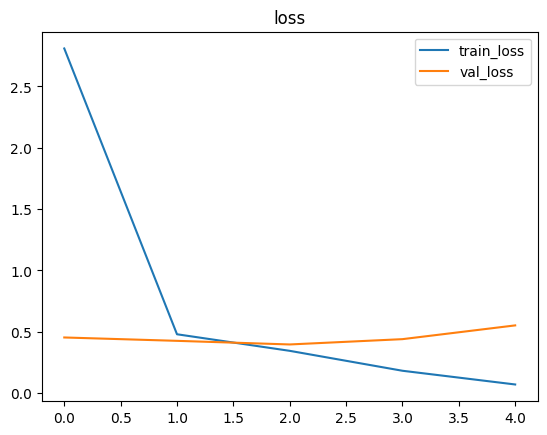

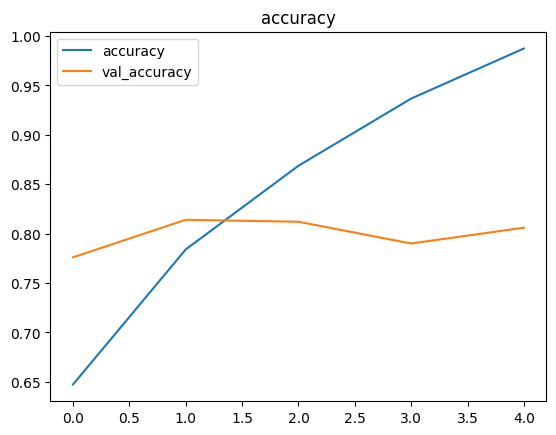

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_6=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history_6=model_6.fit(train_data,epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=valid_data,
                   validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 179ms/step - loss: 0.6231 - accuracy: 0.6407 - val_loss: 0.4306 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4621 - accuracy: 0.7867 - val_loss: 0.3954 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4240 - accuracy: 0.8187 - val_loss: 0.3878 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4139 - accuracy: 0.8167 - val_loss: 0.3772 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.3796 - accuracy: 0.8420 - val_loss: 0.3380 - val_accuracy: 0.8540


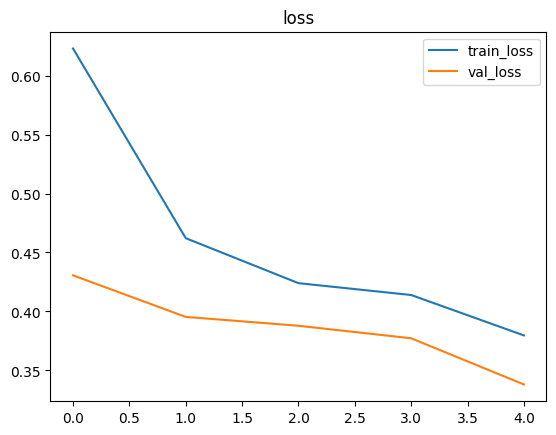

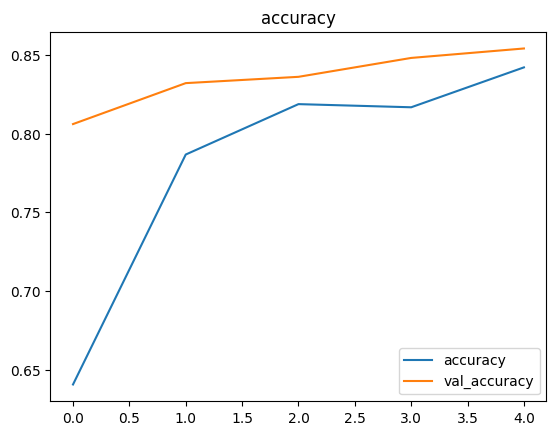

In [ ]:
plot_loss_curves(history_6)

In [ ]:
 model_6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)       

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)

In [ ]:
train_data_gen=ImageDataGenerator(rescale=1/255.)

In [ ]:
test_data_gen=ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle=False)
train_data=train_data_gen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False
                                             )
test_data=test_data_gen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get sample data batches
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()

Text(0.5, 1.0, 'Augmented image')

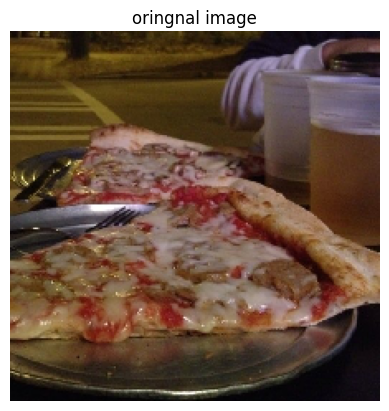

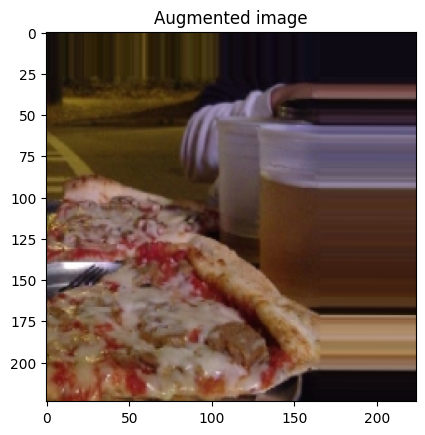

In [ ]:
import random
random_number=random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"oringnal image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")

In [ ]:
model_7=tf.keras.Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=3),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=3),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
    ])


In [ ]:

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuarcy'])

In [ ]:
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history_7=model_7.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 484ms/step - loss: 0.6956 - accuracy: 0.4793 - val_loss: 0.6685 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 30s 647ms/step - loss: 0.6895 - accuracy: 0.5400 - val_loss: 0.6558 - val_accuracy: 0.7240
Epoch 3/5
47/47 [==============================] - 23s 488ms/step - loss: 0.6884 - accuracy: 0.5647 - val_loss: 0.6429 - val_accuracy: 0.5360
Epoch 4/5
47/47 [==============================] - 29s 618ms/step - loss: 0.6700 - accuracy: 0.5427 - val_loss: 0.6189 - val_accuracy: 0.6640
Epoch 5/5
47/47 [==============================] - 28s 575ms/step - loss: 0.6455 - accuracy: 0.6300 - val_loss: 0.5655 - val_accuracy: 0.6620


In [ ]:
model_7 = tf.keras.Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(3, 3)),  # Specify pool_size as a tuple
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=(3, 3)),  # Specify pool_size as a tuple
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Muti-class Image Classification

## Import data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-10-16 05:34:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.207, 142.250.152.207, 74.125.132.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   187MB/s    in 2.6s    

2023-10-16 05:34:35 (187 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} direcories and {len(filenames)} iamges in'{dirpath}'")

there are 2 direcories and 0 iamges in'10_food_classes_all_data'
there are 10 direcories and 0 iamges in'10_food_classes_all_data/train'
there are 0 direcories and 750 iamges in'10_food_classes_all_data/train/ramen'
there are 0 direcories and 750 iamges in'10_food_classes_all_data/train/ice_cream'
there are 0 direcories and 750 iamges in'10_food_classes_all_data/train/pizza'
there are 0 direcories and 750 iamges in'10_food_classes_all_data/train/chicken_wings'
there are 0 direcories and 750 iamges in'10_food_classes_all_data/train/grilled_salmon'
there are 0 direcories and 750 iamges in'10_food_classes_all_data/train/fried_rice'
there are 0 direcories and 750 iamges in'10_food_classes_all_data/train/steak'
there are 0 direcories and 750 iamges in'10_food_classes_all_data/train/hamburger'
there are 0 direcories and 750 iamges in'10_food_classes_all_data/train/chicken_curry'
there are 0 direcories and 750 iamges in'10_food_classes_all_data/train/sushi'
there are 10 direcories and 0 iamge

In [ ]:
#stepup train test directory
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_name=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image Shape:(307, 512, 3)


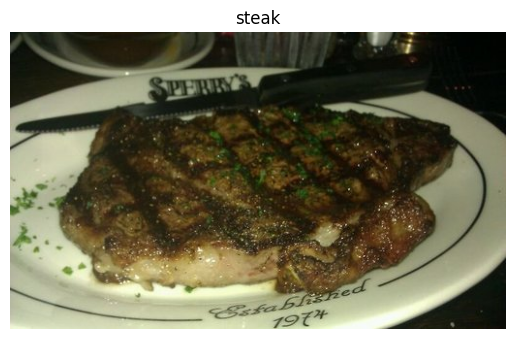

In [ ]:
#Vizualize
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_name))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagin =ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
#Load data in from directories and turn it into batchs
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
model1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(3),
    tf.keras.layers.Conv2D(40,3,activation='relu'),
    tf.keras.layers.MaxPool2D(3),
    tf.keras.layers.Conv2D(30,3,activation='relu'),
    tf.keras.layers.MaxPool2D(3),
    Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")


])

In [ ]:
model1.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history1=model1.fit(train_data, epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 30s 122ms/step - loss: 2.1444 - accuracy: 0.2211 - val_loss: 1.9815 - val_accuracy: 0.2836
Epoch 2/10
235/235 [==============================] - 32s 136ms/step - loss: 1.9032 - accuracy: 0.3388 - val_loss: 1.8838 - val_accuracy: 0.3504
Epoch 3/10
235/235 [==============================] - 28s 120ms/step - loss: 1.7735 - accuracy: 0.3944 - val_loss: 1.7047 - val_accuracy: 0.4188
Epoch 4/10
235/235 [==============================] - 32s 135ms/step - loss: 1.6473 - accuracy: 0.4408 - val_loss: 1.6537 - val_accuracy: 0.4324
Epoch 5/10
235/235 [==============================] - 29s 124ms/step - loss: 1.5634 - accuracy: 0.4707 - val_loss: 1.6010 - val_accuracy: 0.4560
Epoch 6/10
235/235 [==============================] - 31s 130ms/step - loss: 1.4782 - accuracy: 0.5020 - val_loss: 1.5719 - val_accuracy: 0.4660
Epoch 7/10
235/235 [==============================] - 29s 123ms/step - loss: 1.4021 - accuracy: 0.5291 - val_loss: 1.5904 - val_ac

In [ ]:
model1.evaluate(test_data)

79/79 [==============================] - 7s 93ms/step - loss: 1.5844 - accuracy: 0.4804


[1.5843958854675293, 0.4803999960422516]

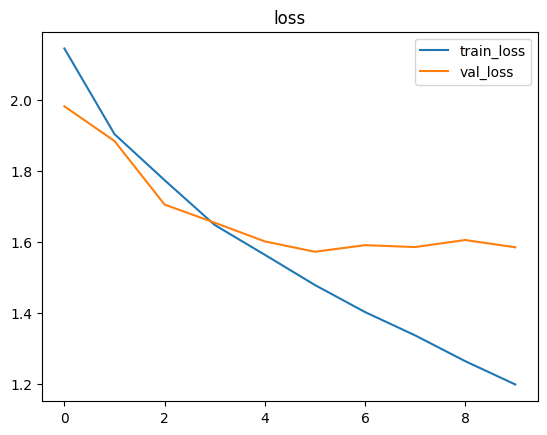

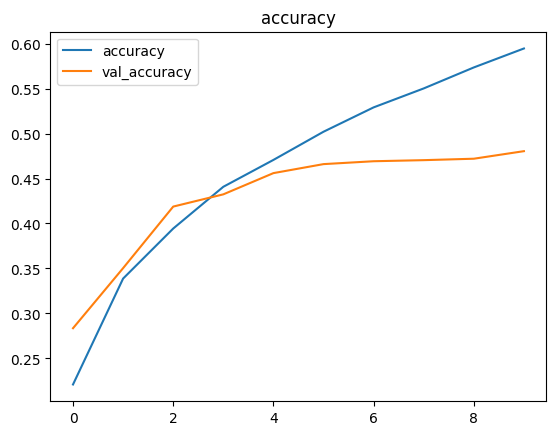

In [ ]:
plot_loss_curves(history1)

In [ ]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 72, 72, 40)        23080     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 24, 24, 40)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 22, 22, 30)        10830     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 7, 7, 30)        

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='categorical',
                                                                 )

Found 7500 images belonging to 10 classes.


In [ ]:
model2=tf.keras.models.clone_model(model1)
model2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history2=model2.fit(train_data_augmented,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 106s 443ms/step - loss: 2.2135 - accuracy: 0.1756 - val_loss: 2.0077 - val_accuracy: 0.2996
Epoch 2/5
235/235 [==============================] - 103s 439ms/step - loss: 2.0603 - accuracy: 0.2747 - val_loss: 1.8901 - val_accuracy: 0.3432
Epoch 3/5
235/235 [==============================] - 105s 448ms/step - loss: 1.9998 - accuracy: 0.2971 - val_loss: 1.8108 - val_accuracy: 0.3760
Epoch 4/5
235/235 [==============================] - 104s 441ms/step - loss: 1.9298 - accuracy: 0.3297 - val_loss: 1.7770 - val_accuracy: 0.4044
Epoch 5/5
235/235 [==============================] - 106s 450ms/step - loss: 1.8949 - accuracy: 0.3480 - val_loss: 1.7228 - val_accuracy: 0.4156


In [ ]:
#save model
model2.save("save_model1")